In [1]:
import numpy as np, matplotlib.pyplot as plt
import os
from scipy import interpolate
from astropy.convolution import convolve_fft, Gaussian1DKernel
from glob import glob

In [2]:
msfire = np.loadtxt('Flux_cal_JHK_2M2255-3118.txt')
wave = msfire[:, 0] # Å
wave_um = msfire[:, 0] * 1e-4 # µm
flux = msfire[:, 1]
unc = msfire[:, 2]
flux_spec = msfire[:, 1] * 1e-11 # erg/cm^2/s/A to W/m^2/um (species units)
unc_spec = msfire[:, 2] * 1e-11

smooth_msfire = np.loadtxt('Flux_cal_JHK_2M2255-3118_spex_res_species_units.txt')
w_smooth = smooth_msfire[0, :]
f_smooth = smooth_msfire[1, :] * 1e11
u_smooth = smooth_msfire[2, :]

w_min = w_smooth[0]
w_max = w_smooth[-1]

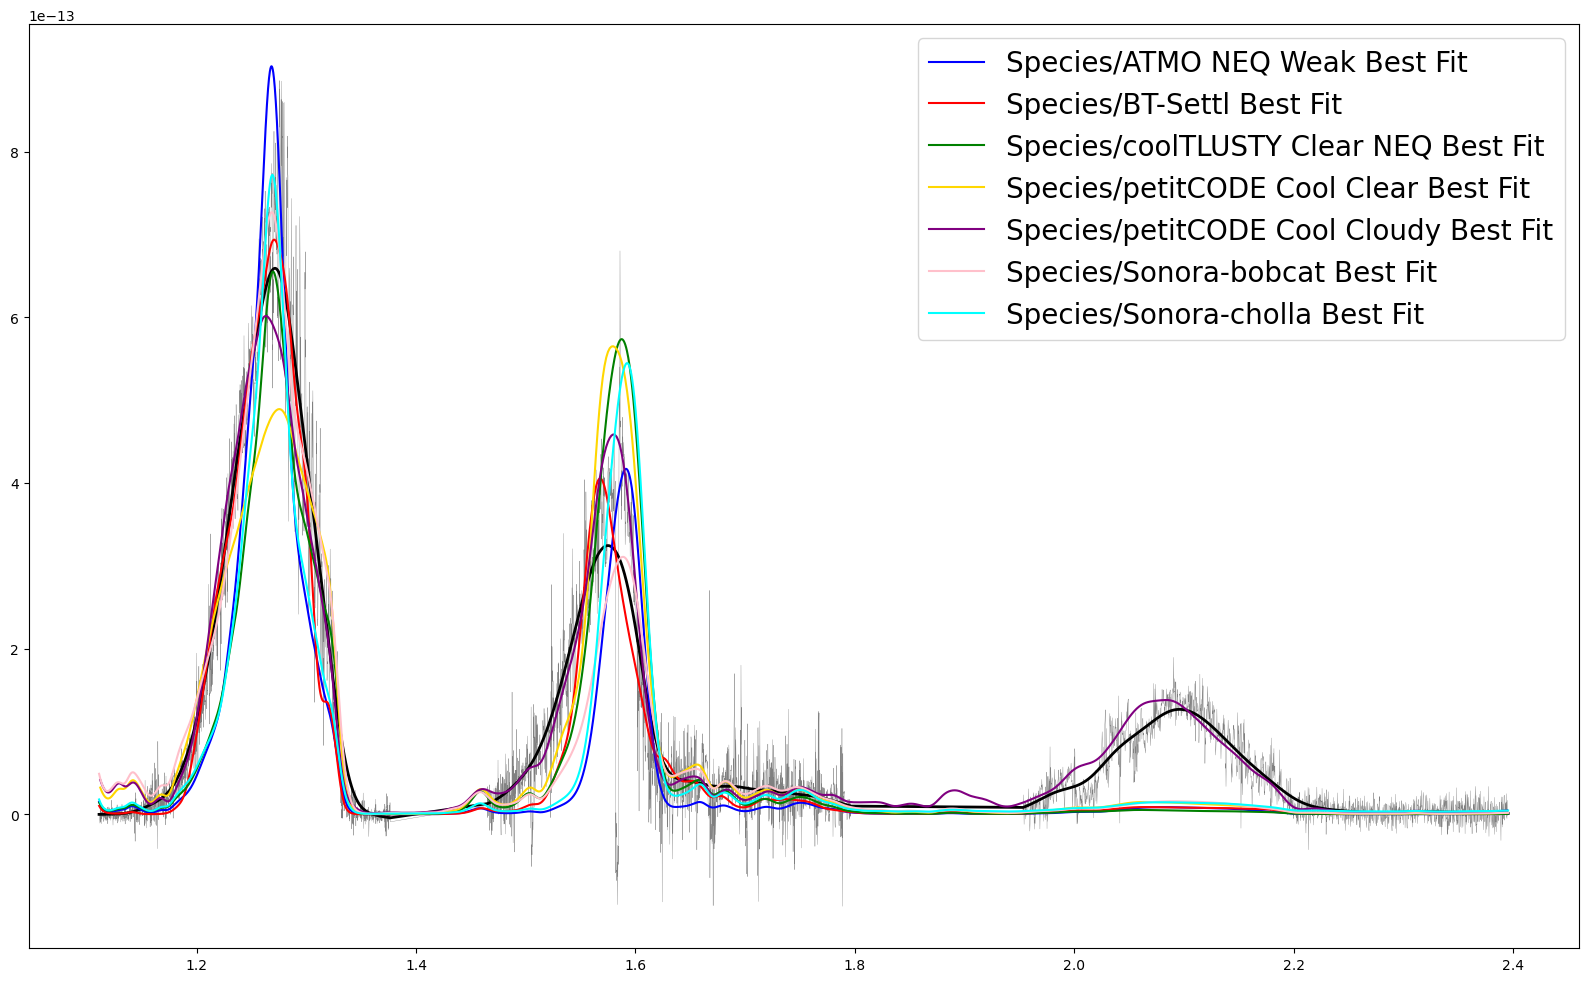

In [3]:
target_short = 'WISE J225540'

#spec_bt = np.loadtxt('species_bestfit_bt-settl_model.txt')
#bt_w = spec_bt[:, 0]
#bt_f = spec_bt[:, 1] * 1e11
#bt_mask = (bt_w >= w_min) & (bt_w <= w_max)
#bt_wave = bt_w[bt_mask]
#bt_flux = bt_f[bt_mask]

spec_atmoNWsmooth = np.loadtxt('species_bestfit_atmo-neq-weak_spexres.txt')
atmoNWsmooth_w = spec_atmoNWsmooth[:, 0]
atmoNWsmooth_f = spec_atmoNWsmooth[:, 1] * 1e11
atmoNWsmooth_mask = (atmoNWsmooth_w >= w_min) & (atmoNWsmooth_w <= w_max)
atmoNWsmooth_wave = atmoNWsmooth_w[atmoNWsmooth_mask]
atmoNWsmooth_flux = atmoNWsmooth_f[atmoNWsmooth_mask]

spec_btsmooth = np.loadtxt('species_bestfit_bt-settl_spexres_model.txt')
btsmooth_w = spec_btsmooth[:, 0]
btsmooth_f = spec_btsmooth[:, 1] * 1e11
btsmooth_mask = (btsmooth_w >= w_min) & (btsmooth_w <= w_max)
btsmooth_wave = btsmooth_w[btsmooth_mask]
btsmooth_flux = btsmooth_f[btsmooth_mask]

spec_coolTLUSTY = np.loadtxt('species_bestfit_lacy2023-clear-neq_spexres_model.txt')
coolTLUSTY_w = spec_coolTLUSTY[:, 0]
coolTLUSTY_f = spec_coolTLUSTY[:, 1] * 1e11
coolTLUSTY_mask = (coolTLUSTY_w >= w_min) & (coolTLUSTY_w <= w_max)
coolTLUSTY_wave = coolTLUSTY_w[coolTLUSTY_mask]
coolTLUSTY_flux = coolTLUSTY_f[coolTLUSTY_mask]

spec_petitcoolclear = np.loadtxt('species_bestfit_petitcode-cool-clear_spexres_model.txt')
petitcoolclear_w = spec_petitcoolclear[:, 0]
petitcoolclear_f = spec_petitcoolclear[:, 1] * 1e11
petitcoolclear_mask = (petitcoolclear_w >= w_min) & (petitcoolclear_w <= w_max)
petitcoolclear_wave = petitcoolclear_w[petitcoolclear_mask]
petitcoolclear_flux = petitcoolclear_f[petitcoolclear_mask]

spec_petitcoolcloudy = np.loadtxt('species_bestfit_petitcode-cool-cloudy_spexres_model.txt')
petitcoolcloudy_w = spec_petitcoolcloudy[:, 0]
petitcoolcloudy_f = spec_petitcoolcloudy[:, 1] * 1e11
petitcoolcloudy_mask = (petitcoolcloudy_w >= w_min) & (petitcoolcloudy_w <= w_max)
petitcoolcloudy_wave = petitcoolcloudy_w[petitcoolcloudy_mask]
petitcoolcloudy_flux = petitcoolcloudy_f[petitcoolcloudy_mask]

spec_bobcatsmooth = np.loadtxt('species_bestfit_sonora-bobcat_spexres.txt')
bobcatsmooth_w = spec_bobcatsmooth[:, 0]
bobcatsmooth_f = spec_bobcatsmooth[:, 1] * 1e11
bobcatsmooth_mask = (bobcatsmooth_w >= w_min) & (bobcatsmooth_w <= w_max)
bobcatsmooth_wave = bobcatsmooth_w[bobcatsmooth_mask]
bobcatsmooth_flux = bobcatsmooth_f[bobcatsmooth_mask]

spec_chollasmooth = np.loadtxt('species_bestfit_sonora-cholla_spexres.txt')
chollasmooth_w = spec_chollasmooth[:, 0]
chollasmooth_f = spec_chollasmooth[:, 1] * 1e11
chollasmooth_mask = (chollasmooth_w >= w_min) & (chollasmooth_w <= w_max)
chollasmooth_wave = chollasmooth_w[chollasmooth_mask]
chollasmooth_flux = chollasmooth_f[chollasmooth_mask]

plt.figure(figsize = (20, 12))
plt.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
plt.plot(w_smooth, f_smooth, color = 'black', linewidth = 2)
plt.plot(atmoNWsmooth_wave, atmoNWsmooth_flux, color = 'blue', label = 'Species/ATMO NEQ Weak Best Fit')
plt.plot(btsmooth_wave, btsmooth_flux, color = 'red', label = 'Species/BT-Settl Best Fit')
plt.plot(coolTLUSTY_wave, coolTLUSTY_flux, color = 'green', label = 'Species/coolTLUSTY Clear NEQ Best Fit')
plt.plot(petitcoolclear_wave, petitcoolclear_flux, color = 'gold', label = 'Species/petitCODE Cool Clear Best Fit')
plt.plot(petitcoolcloudy_wave, petitcoolcloudy_flux, color = 'purple', label = 'Species/petitCODE Cool Cloudy Best Fit')
plt.plot(bobcatsmooth_wave, bobcatsmooth_flux, color = 'pink', label = 'Species/Sonora-bobcat Best Fit')
plt.plot(chollasmooth_wave, chollasmooth_flux, color = 'aqua', label = 'Species/Sonora-cholla Best Fit')
plt.legend(loc = 'upper right', fontsize = 20)

In [4]:
def convolve_v2(spec, R, sample):
    '''
    This will convolve a model spectrum with a gaussian kernel to the given resolution of the observations [R].
    * Parameters:
        * spec: source spectrum (the object that will be convolved)
        * R: int (the resolution (dL/L) to convolve to)
        * sample: int (oversampling factor for smoothing)
    * Returns:
        * smooth_spec: the convolved spectrum (and possibly the original grid)
    * Notes:
        * Built to work in tandem with bestfit_[model]()
        * Needs numpy as np and convolve_fft, Gaussian1DKernel from astropy.convolution
    '''
    ## Define the model wavelength and flux grids
    w_grid = spec[0, :]
    f_grid = spec[1, :]

    ## Define a logarithmic wavelength grid
    w_logmin = np.log10(np.nanmin(w_grid))
    w_logmax = np.log10(np.nanmax(w_grid))
    N = np.size(w_grid) * sample
    w_loggrid = np.logspace(w_logmin, w_logmax, num = N)

    ## Calculate the standard deviation of the Gaussian kernel
    R_grid = (w_loggrid[1:-1] + w_loggrid[0:-2]) / (w_loggrid[1:-1] - w_loggrid[0:-2]) / 2
    sigma = np.median(R_grid) / R
    if sigma < 1:
        sigma = 1

    ## Interpolate the models onto the log grid, convolve them, and interpolate the results onto the original grid
    f_log = np.interp(w_loggrid, w_grid, f_grid)
    gauss = Gaussian1DKernel(stddev = sigma)
    f_conv = convolve_fft(f_log, gauss)
    f_smooth = np.interp(w_grid, w_loggrid, f_conv)
    smooth_spec = np.vstack([w_grid, f_smooth])

    return smooth_spec

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1673591719.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_atmoNWmin = np.where(G_atmoNW == G_atmoNWmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1673591719.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_atmoNW = int(where_G_atmoNWmin[0])
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1673591719.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing

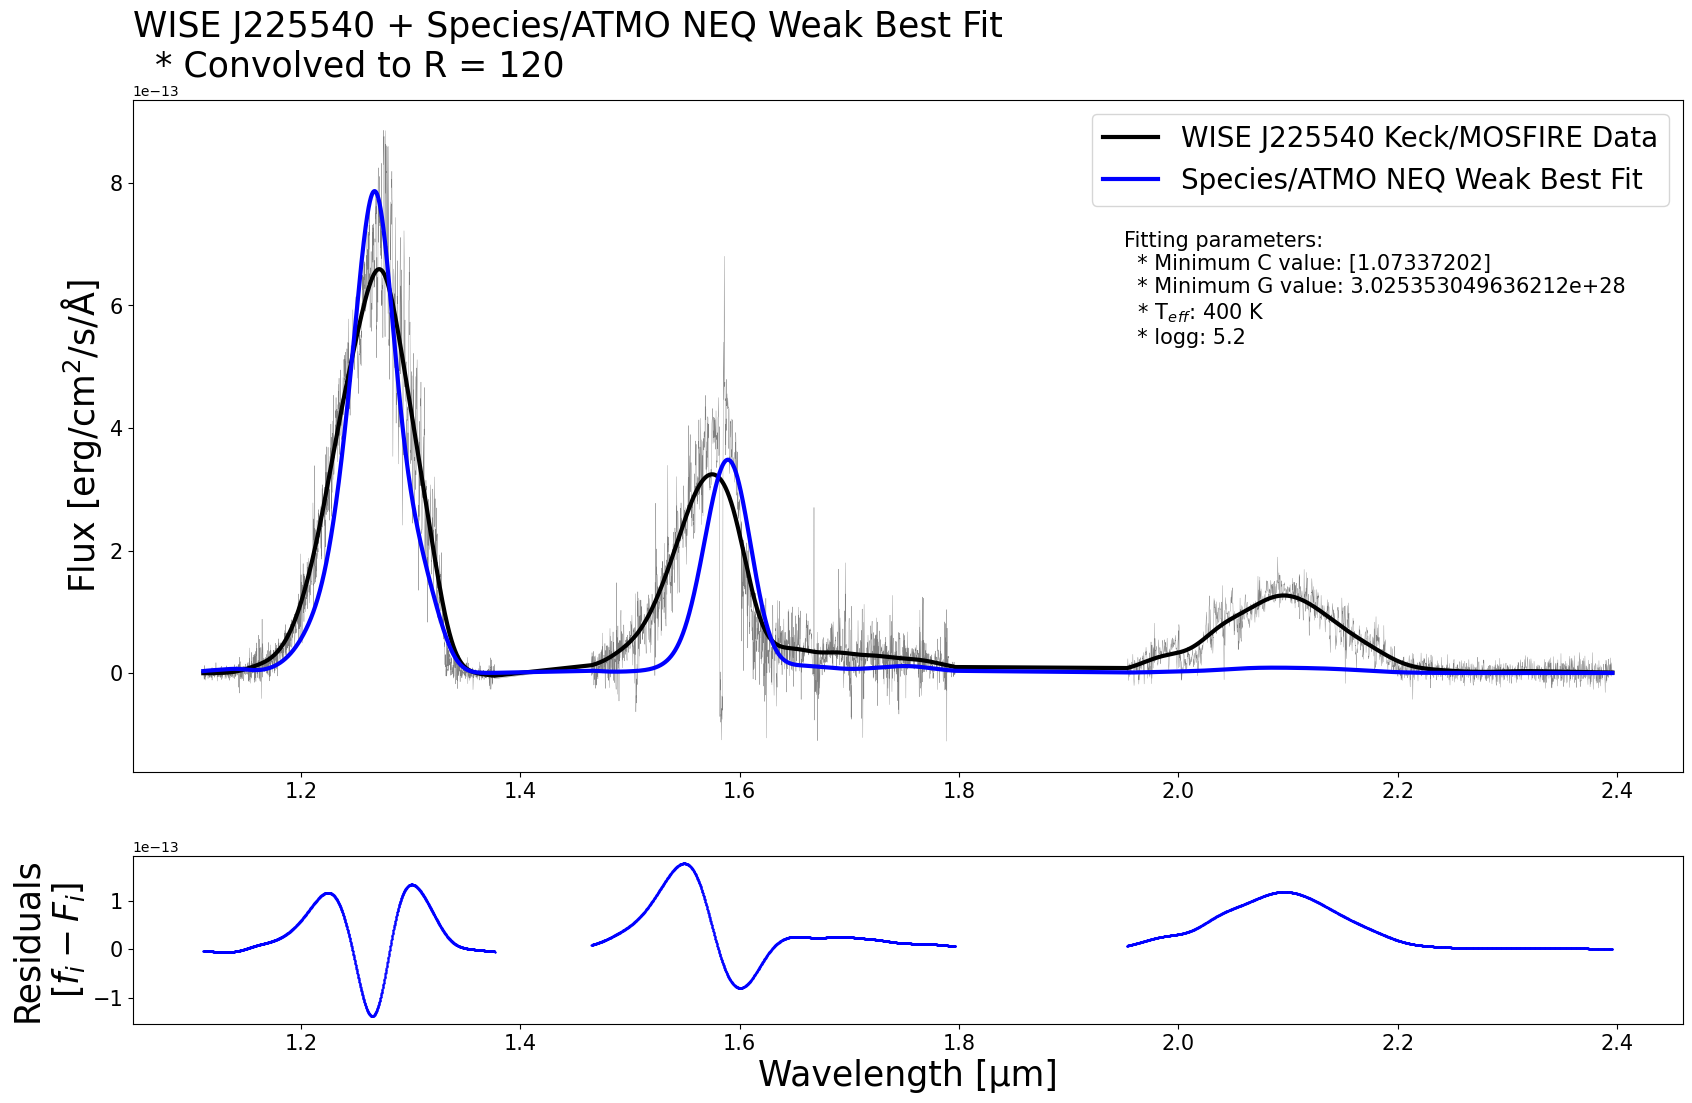

In [5]:
####################################
## Species/ATMO NEQ Weak Fitting ##
####################################

C_atmoNW = np.zeros(len(atmoNWsmooth_wave))
G_atmoNW = np.zeros(len(atmoNWsmooth_wave))
low_mod_atmoNW = np.zeros((len(atmoNWsmooth_wave), 2, (len(wave_um))))
for i in range(len(atmoNWsmooth_wave)):
    interp_atmoNW = np.interp(wave_um, atmoNWsmooth_wave, atmoNWsmooth_flux)
    range_atmoNW = np.vstack([wave_um, interp_atmoNW])
    low_mod_atmoNW[i, :, :] = convolve_v2(range_atmoNW, 120, 1)
    C_atmoNW[i] = (np.nansum((low_mod_atmoNW[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_atmoNW[i, 1, :] ** 2 / u_smooth ** 2))
G_atmoNW = np.nansum(((f_smooth - low_mod_atmoNW[i, 1, :] * C_atmoNW[i]) / u_smooth) ** 2)
G_atmoNWmin = np.min(G_atmoNW)
where_G_atmoNWmin = np.where(G_atmoNW == G_atmoNWmin)
C_atmoNWmin = C_atmoNW[where_G_atmoNWmin]
modindex_atmoNW = int(where_G_atmoNWmin[0])
residuals_atmoNW = f_smooth - low_mod_atmoNW[int(where_G_atmoNWmin[0]), 1, :] * C_atmoNWmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_atmoNW[modindex_atmoNW, 0, :], low_mod_atmoNW[modindex_atmoNW, 1, :] * C_atmoNWmin, color = 'blue', linewidth = 3, label = 'Species/ATMO NEQ Weak Best Fit')
ax1.set_title(f'{target_short} + Species/ATMO NEQ Weak Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_atmoNWmin}\n  * Minimum G value: {G_atmoNWmin}\n  * T$_e$$_f$$_f$: 400 K\n  * logg: 5.2\n', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_atmoNW, color = 'blue', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species ATMO NEQ Weak Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/2685259145.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_btmin = np.where(G_bt == G_btmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/2685259145.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_bt = int(where_G_btmin[0])
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/2685259145.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (De

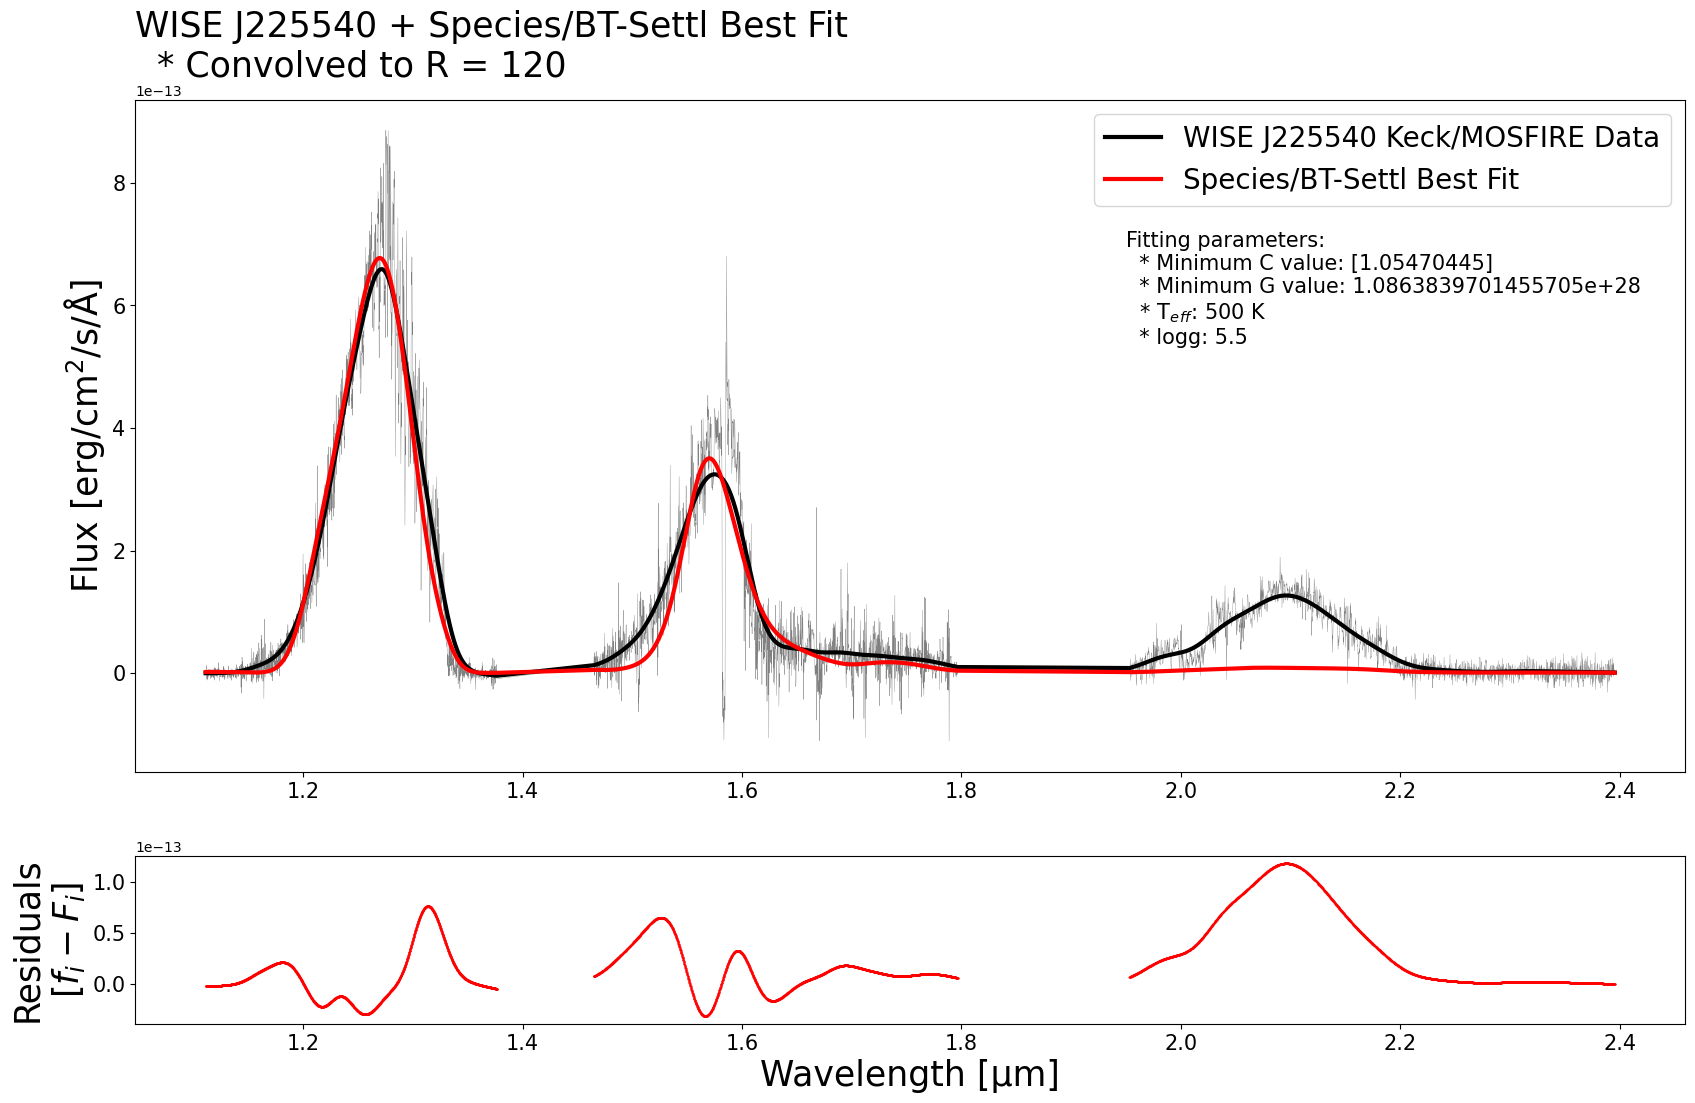

In [6]:
##############################
## Species/BT-Settl Fitting ##
##############################

C_bt = np.zeros(len(btsmooth_wave))
G_bt = np.zeros(len(btsmooth_wave))
low_mod_bt = np.zeros((len(btsmooth_wave), 2, (len(wave_um))))
for i in range(len(btsmooth_wave)):
    interp_bt = np.interp(wave_um, btsmooth_wave, btsmooth_flux)
    range_bt = np.vstack([wave_um, interp_bt])
    low_mod_bt[i, :, :] = convolve_v2(range_bt, 120, 1)
    C_bt[i] = (np.nansum((low_mod_bt[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_bt[i, 1, :] ** 2 / u_smooth ** 2))
G_bt = np.nansum(((f_smooth - low_mod_bt[i, 1, :] * C_bt[i]) / u_smooth) ** 2)
G_btmin = np.min(G_bt)
where_G_btmin = np.where(G_bt == G_btmin)
C_btmin = C_bt[where_G_btmin]
modindex_bt = int(where_G_btmin[0])
residuals_bt = f_smooth - low_mod_bt[int(where_G_btmin[0]), 1, :] * C_btmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_bt[modindex_bt, 0, :], low_mod_bt[modindex_bt, 1, :] * C_btmin, color = 'red', linewidth = 3, label = 'Species/BT-Settl Best Fit')
ax1.set_title(f'{target_short} + Species/BT-Settl Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_btmin}\n  * Minimum G value: {G_btmin}\n  * T$_e$$_f$$_f$: 500 K\n  * logg: 5.5\n', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_bt, color = 'red', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species BT-Settl Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/410455617.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_coolTLUSTYmin = np.where(G_coolTLUSTY == G_coolTLUSTYmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/410455617.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_coolTLUSTY = int(where_G_coolTLUSTYmin[0])


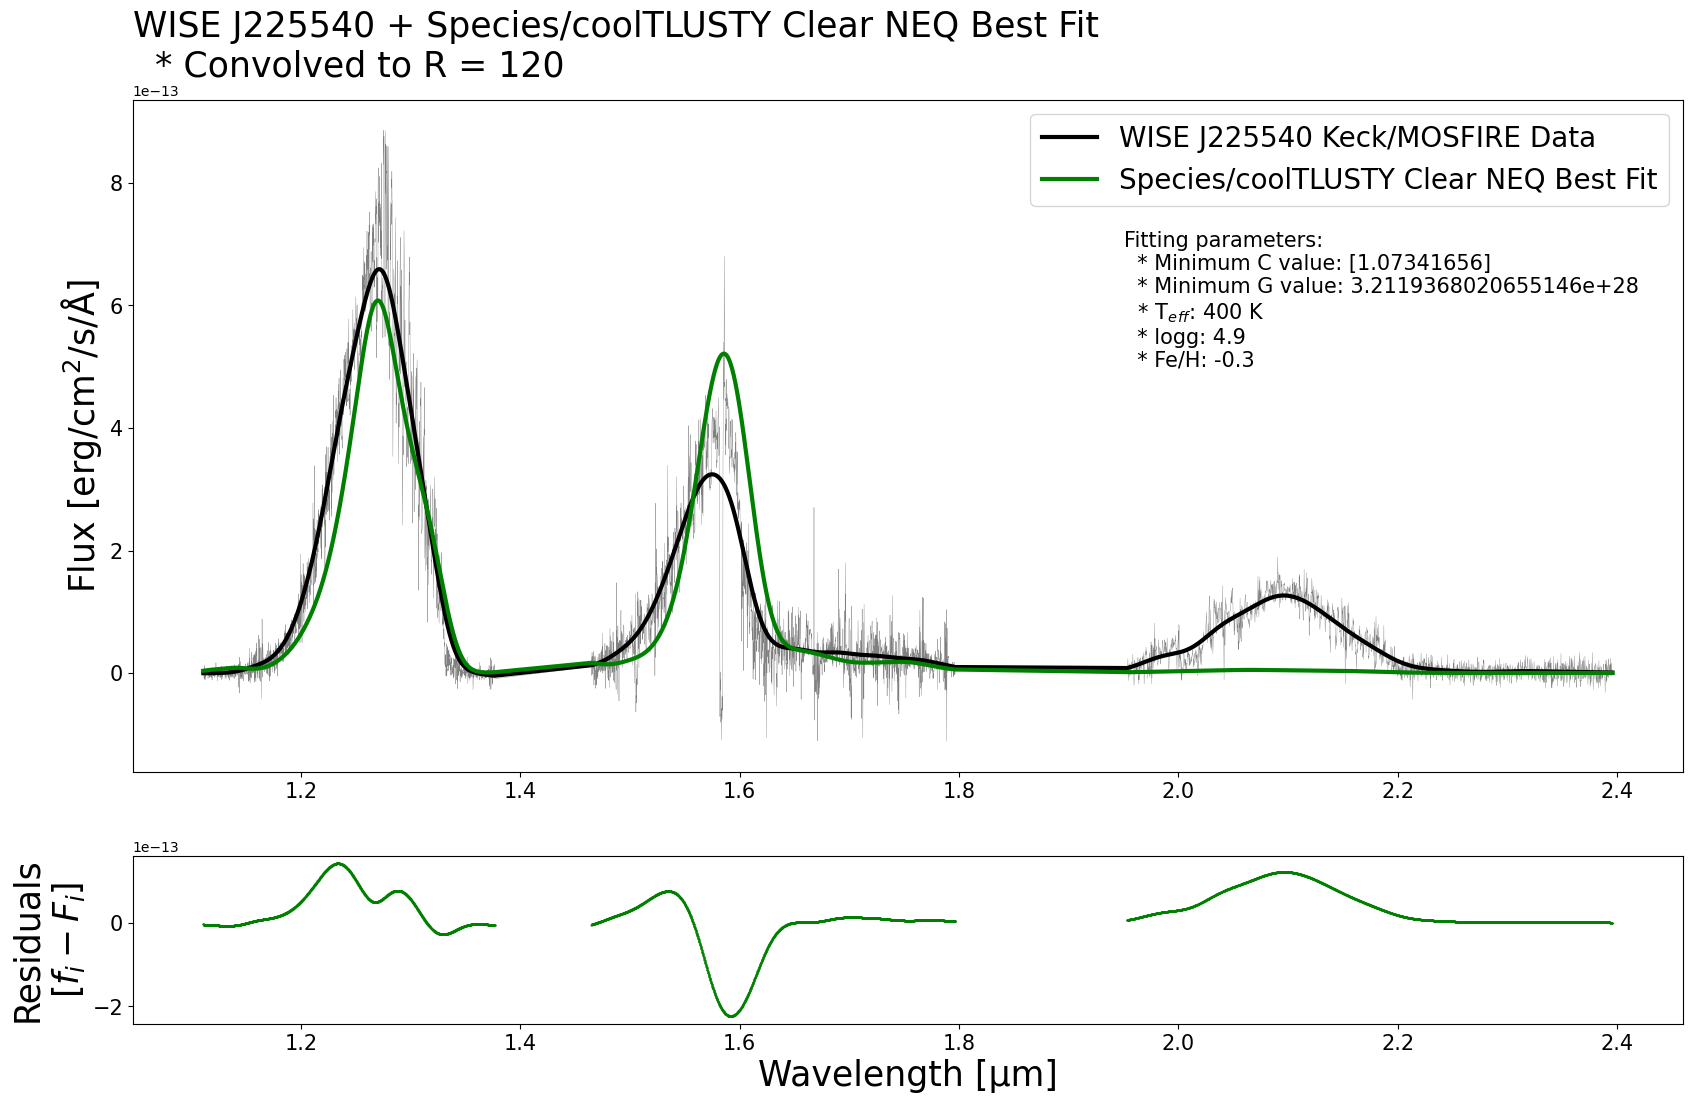

In [7]:
##########################################
## Species/coolTLUSTY Clear NEQ Fitting ##
##########################################

C_coolTLUSTY = np.zeros(len(coolTLUSTY_wave))
G_coolTLUSTY = np.zeros(len(coolTLUSTY_flux))
low_mod_coolTLUSTY = np.zeros((len(coolTLUSTY_wave), 2, (len(wave_um))))
for i in range(len(coolTLUSTY_wave)):
    interp_coolTLUSTY = np.interp(wave_um, coolTLUSTY_wave, coolTLUSTY_flux)
    range_coolTLUSTY = np.vstack([wave_um, interp_coolTLUSTY])
    low_mod_coolTLUSTY[i, :, :] = convolve_v2(range_coolTLUSTY, 120, 1)
    C_coolTLUSTY[i] = (np.nansum((low_mod_coolTLUSTY[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_coolTLUSTY[i, 1, :] ** 2 / u_smooth ** 2))
G_coolTLUSTY = np.nansum(((f_smooth - low_mod_coolTLUSTY[i, 1, :] * C_coolTLUSTY[i]) / u_smooth) ** 2)
G_coolTLUSTYmin = np.min(G_coolTLUSTY)
where_G_coolTLUSTYmin = np.where(G_coolTLUSTY == G_coolTLUSTYmin)
C_coolTLUSTYmin = C_coolTLUSTY[where_G_coolTLUSTYmin]
modindex_coolTLUSTY = int(where_G_coolTLUSTYmin[0])
residuals_coolTLUSTY = f_smooth - low_mod_coolTLUSTY[modindex_coolTLUSTY, 1, :] * C_coolTLUSTYmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4,1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_coolTLUSTY[modindex_coolTLUSTY, 0, :], low_mod_coolTLUSTY[modindex_coolTLUSTY, 1, :] * C_coolTLUSTYmin, color = 'green', linewidth = 3, label = 'Species/coolTLUSTY Clear NEQ Best Fit')
ax1.set_title(f'{target_short} + Species/coolTLUSTY Clear NEQ Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_coolTLUSTYmin}\n  * Minimum G value: {G_coolTLUSTYmin}\n  * T$_e$$_f$$_f$: 400 K\n  * logg: 4.9\n  * Fe/H: -0.3', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_coolTLUSTY, color = 'green', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species coolTLUSTY Clear NEQ Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/4016282474.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_petitcoolclearmin = np.where(G_petitcoolclear == G_petitcoolclearmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/4016282474.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_petitcoolclear = int(where_G_petitcoolclearmin[0])


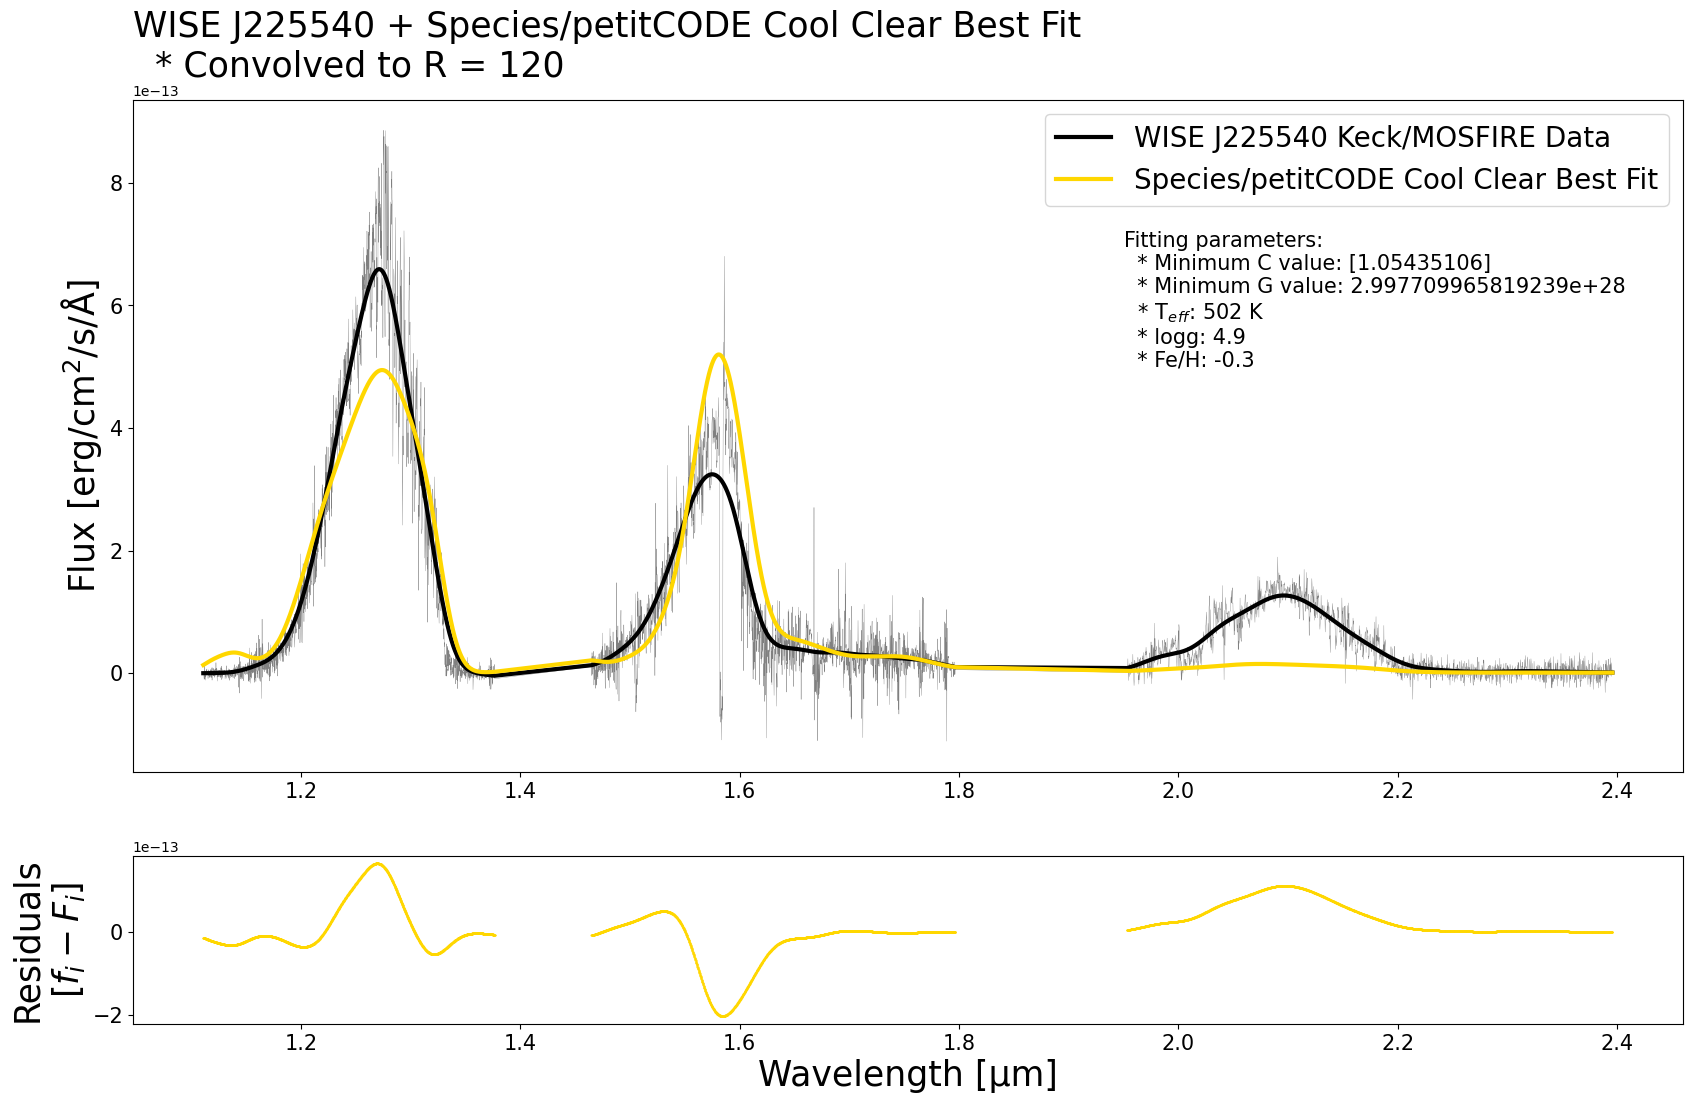

In [8]:
##########################################
## Species/petitCODE Cool Clear Fitting ##
##########################################

C_petitcoolclear = np.zeros(len(petitcoolclear_wave))
G_petitcoolclear = np.zeros(len(petitcoolclear_wave))
low_mod_petitcoolclear = np.zeros((len(petitcoolclear_wave), 2, (len(wave_um))))
for i in range(len(petitcoolclear_wave)):
    interp_petitcoolclear = np.interp(wave_um, petitcoolclear_wave, petitcoolclear_flux)
    range_petitcoolclear = np.vstack([wave_um, interp_petitcoolclear])
    low_mod_petitcoolclear[i, :, :] = convolve_v2(range_petitcoolclear, 120, 1)
    C_petitcoolclear[i] = (np.nansum((low_mod_petitcoolclear[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_petitcoolclear[i, 1, :] ** 2 / u_smooth ** 2))
G_petitcoolclear = np.nansum(((f_smooth - low_mod_petitcoolclear[i, 1, :] * C_petitcoolclear[i]) / u_smooth) ** 2)
G_petitcoolclearmin = np.min(G_petitcoolclear)
where_G_petitcoolclearmin = np.where(G_petitcoolclear == G_petitcoolclearmin)
C_petitcoolclearmin = C_petitcoolclear[where_G_petitcoolclearmin]
modindex_petitcoolclear = int(where_G_petitcoolclearmin[0])
residuals_petitcoolclear = f_smooth - low_mod_petitcoolclear[modindex_petitcoolclear, 1, :] * C_petitcoolclearmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_petitcoolclear[modindex_petitcoolclear, 0, :], low_mod_petitcoolclear[modindex_petitcoolclear, 1, :] * C_petitcoolclearmin, color = 'gold', linewidth = 3, label = 'Species/petitCODE Cool Clear Best Fit')
ax1.set_title(f'{target_short} + Species/petitCODE Cool Clear Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_petitcoolclearmin}\n  * Minimum G value: {G_petitcoolclearmin}\n  * T$_e$$_f$$_f$: 502 K\n  * logg: 4.9\n  * Fe/H: -0.3', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_petitcoolclear, color = 'gold', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species petitCODE Cool Clear Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1481604397.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_petitcoolcloudymin = np.where(G_petitcoolcloudy == G_petitcoolcloudymin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1481604397.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_petitcoolcloudy = int(where_G_petitcoolcloudymin[0])


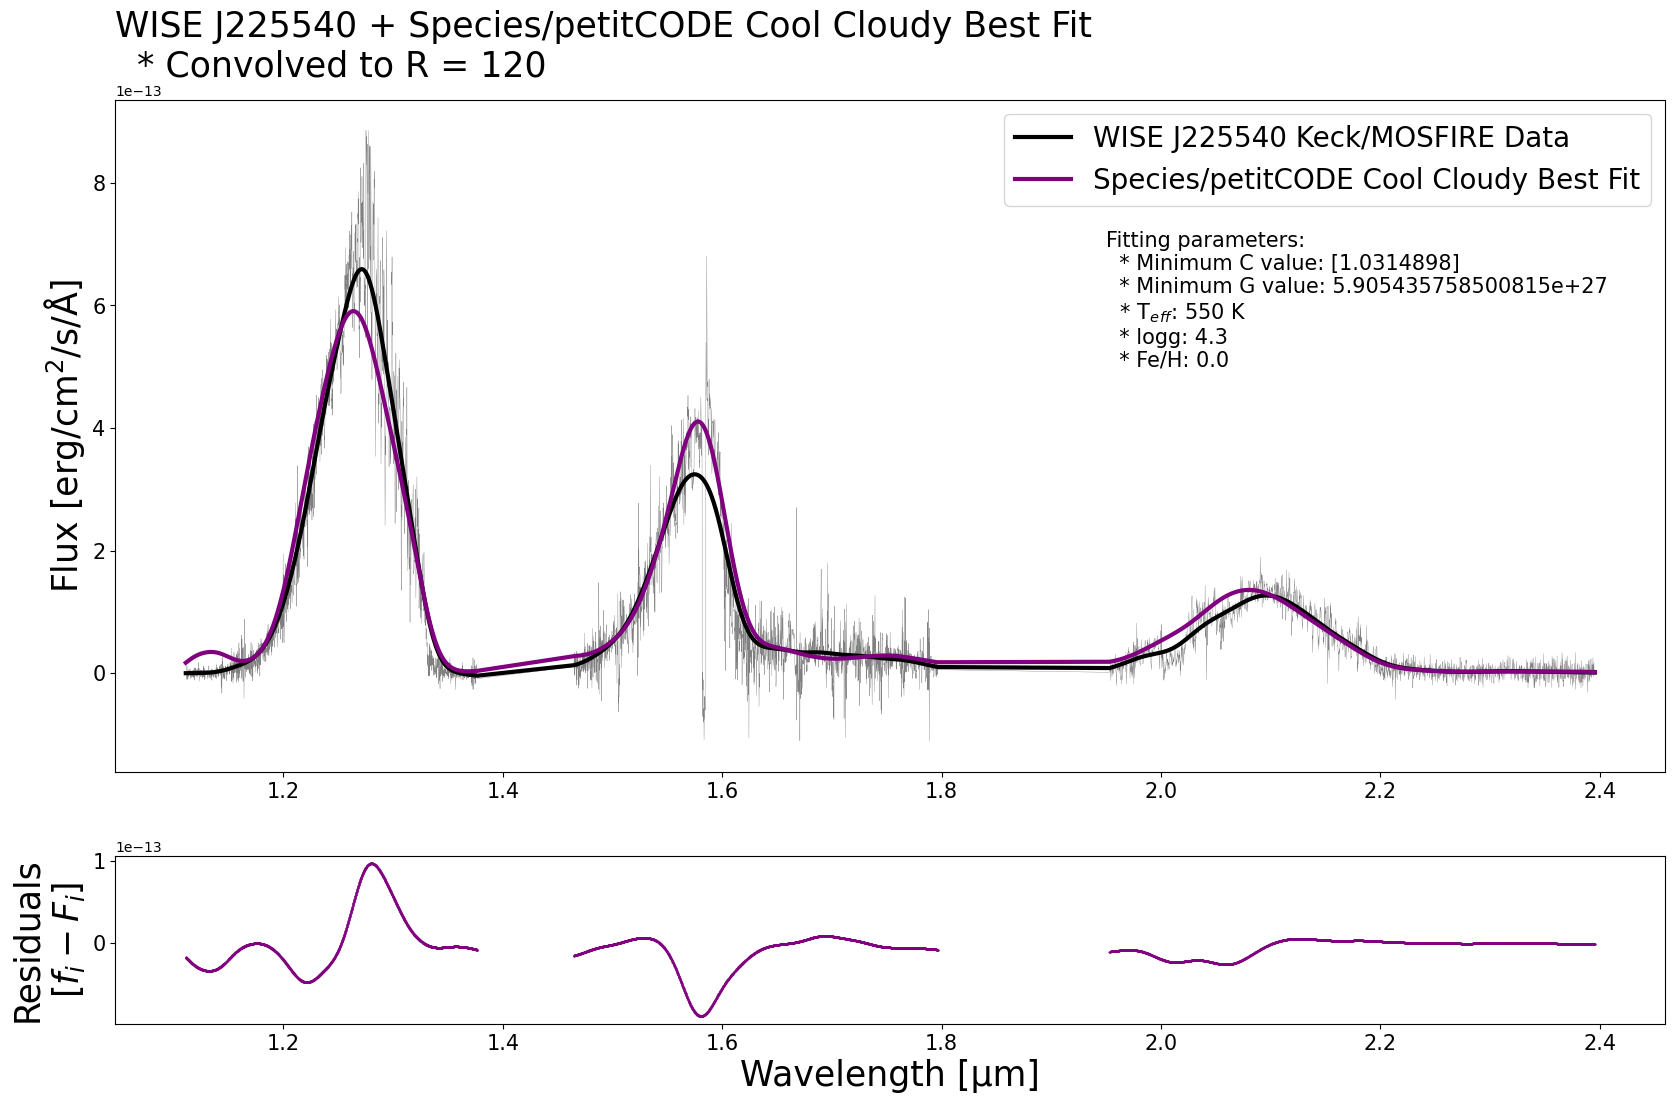

In [9]:
###########################################
## Species/petitCODE Cool Cloudy Fitting ##
###########################################

C_petitcoolcloudy = np.zeros(len(petitcoolcloudy_wave))
G_petitcoolcloudy = np.zeros(len(petitcoolcloudy_wave))
low_mod_petitcoolcloudy = np.zeros((len(petitcoolcloudy_wave), 2, (len(wave_um))))
for i in range(len(petitcoolcloudy_wave)):
    interp_petitcoolcloudy = np.interp(wave_um, petitcoolcloudy_wave, petitcoolcloudy_flux)
    range_petitcoolcloudy = np.vstack([wave_um, interp_petitcoolcloudy])
    low_mod_petitcoolcloudy[i, :, :] = convolve_v2(range_petitcoolcloudy, 120, 1)
    C_petitcoolcloudy[i] = (np.nansum((low_mod_petitcoolcloudy[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_petitcoolcloudy[i, 1, :] ** 2 / u_smooth ** 2))
G_petitcoolcloudy = np.nansum(((f_smooth - low_mod_petitcoolcloudy[i, 1, :] * C_petitcoolcloudy[i]) / u_smooth) ** 2)
G_petitcoolcloudymin = np.min(G_petitcoolcloudy)
where_G_petitcoolcloudymin = np.where(G_petitcoolcloudy == G_petitcoolcloudymin)
C_petitcoolcloudymin = C_petitcoolcloudy[where_G_petitcoolcloudymin]
modindex_petitcoolcloudy = int(where_G_petitcoolcloudymin[0])
residuals_petitcoolcloudy = f_smooth - low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 0, :], low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin, color = 'purple', linewidth = 3, label = 'Species/petitCODE Cool Cloudy Best Fit')
ax1.set_title(f'{target_short} + Species/petitCODE Cool Cloudy Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_petitcoolcloudymin}\n  * Minimum G value: {G_petitcoolcloudymin}\n  * T$_e$$_f$$_f$: 550 K\n  * logg: 4.3\n  * Fe/H: 0.0', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_petitcoolcloudy, color = 'purple', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species petitCODE Cool Cloudy Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1520193904.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_bobcatmin = np.where(G_bobcat == G_bobcatmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1520193904.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_bobcat = int(where_G_bobcatmin[0])
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1520193904.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing

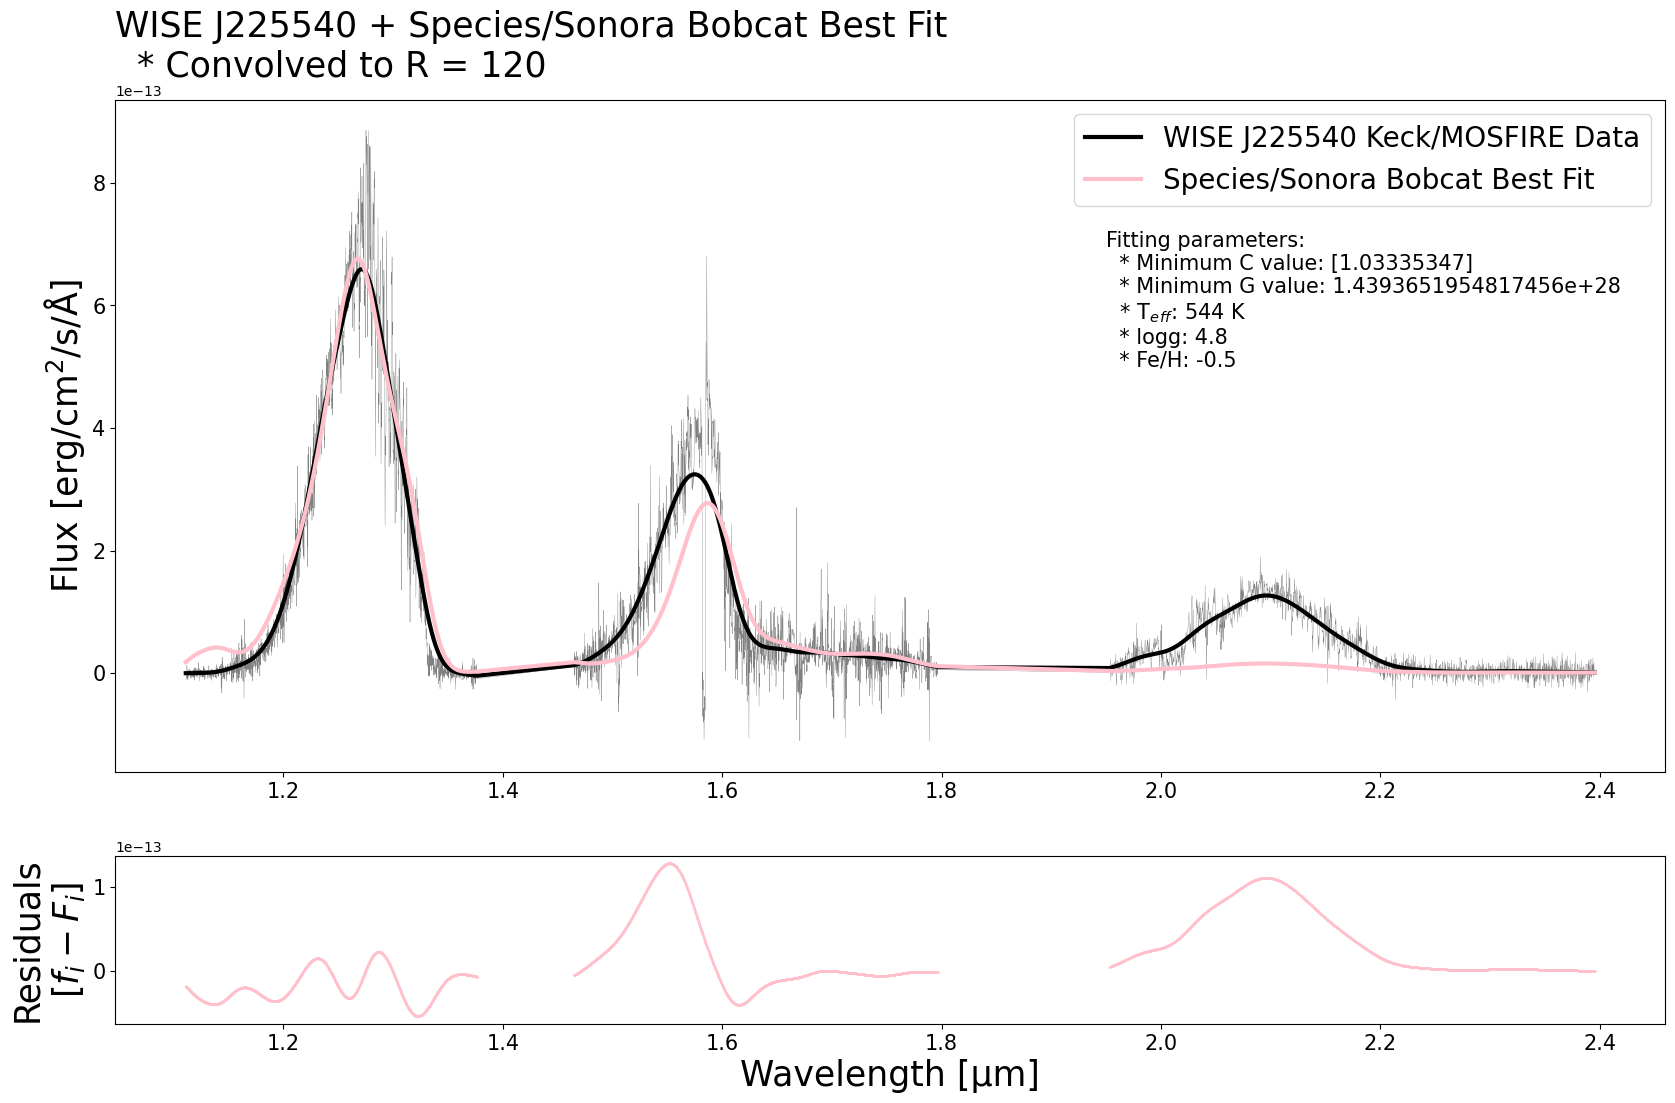

In [10]:
###################################
## Species/Sonora-bobcat Fitting ##
###################################

C_bobcat = np.zeros(len(bobcatsmooth_wave))
G_bobcat = np.zeros(len(bobcatsmooth_wave))
low_mod_bobcat = np.zeros((len(bobcatsmooth_wave), 2, (len(wave_um))))
for i in range(len(bobcatsmooth_wave)):
    interp_bobcat = np.interp(wave_um, bobcatsmooth_wave, bobcatsmooth_flux)
    range_bobcat = np.vstack([wave_um, interp_bobcat])
    low_mod_bobcat[i, :, :] = convolve_v2(range_bobcat, 120, 1)
    C_bobcat[i] = (np.nansum((low_mod_bobcat[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_bobcat[i, 1, :] ** 2 / u_smooth ** 2))
G_bobcat = np.nansum(((f_smooth - low_mod_bobcat[i, 1, :] * C_bobcat[i]) / u_smooth) ** 2)
G_bobcatmin = np.min(G_bobcat)
where_G_bobcatmin = np.where(G_bobcat == G_bobcatmin)
C_bobcatmin = C_bobcat[where_G_bobcatmin]
modindex_bobcat = int(where_G_bobcatmin[0])
residuals_bobcat = f_smooth - low_mod_bobcat[int(where_G_bobcatmin[0]), 1, :] * C_bobcatmin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_bobcat[modindex_bobcat, 0, :], low_mod_bobcat[modindex_bobcat, 1, :] * C_bobcatmin, color = 'pink', linewidth = 3, label = 'Species/Sonora Bobcat Best Fit')
ax1.set_title(f'{target_short} + Species/Sonora Bobcat Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_bobcatmin}\n  * Minimum G value: {G_bobcatmin}\n  * T$_e$$_f$$_f$: 544 K\n  * logg: 4.8\n  * Fe/H: -0.5', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_bobcat, color = 'pink', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species Sonora Bobcat Best Fit')

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1460557702.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_chollamin = np.where(G_cholla == G_chollamin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1460557702.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_cholla = int(where_G_chollamin[0])
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1460557702.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing

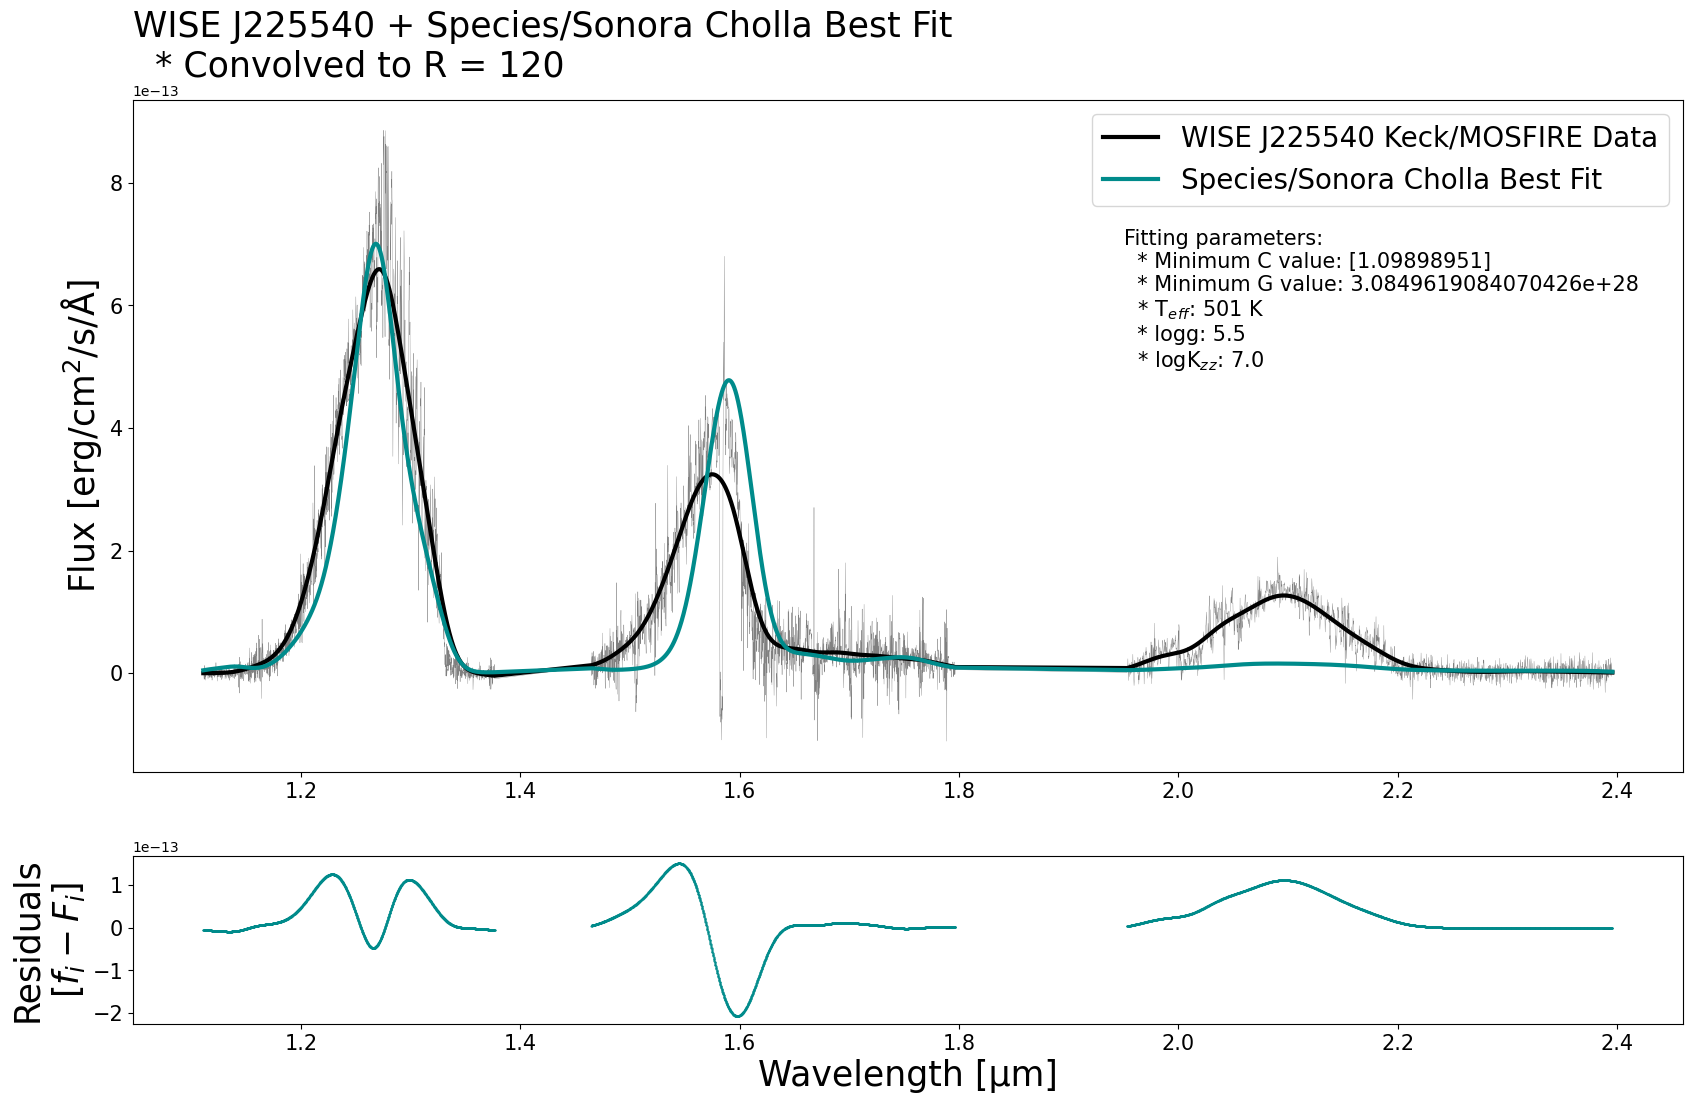

In [11]:
###################################
## Species/Sonora-cholla Fitting ##
###################################

C_cholla = np.zeros(len(chollasmooth_wave))
G_cholla = np.zeros(len(chollasmooth_wave))
low_mod_cholla = np.zeros((len(chollasmooth_wave), 2, (len(wave_um))))
for i in range(len(chollasmooth_wave)):
    interp_cholla = np.interp(wave_um, chollasmooth_wave, chollasmooth_flux)
    range_cholla = np.vstack([wave_um, interp_cholla])
    low_mod_cholla[i, :, :] = convolve_v2(range_cholla, 120, 1)
    C_cholla[i] = (np.nansum((low_mod_cholla[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_cholla[i, 1, :] ** 2 / u_smooth ** 2))
G_cholla = np.nansum(((f_smooth - low_mod_cholla[i, 1, :] * C_cholla[i]) / u_smooth) ** 2)
G_chollamin = np.min(G_cholla)
where_G_chollamin = np.where(G_cholla == G_chollamin)
C_chollamin = C_cholla[where_G_chollamin]
modindex_cholla = int(where_G_chollamin[0])
residuals_cholla = f_smooth - low_mod_cholla[int(where_G_chollamin[0]), 1, :] * C_chollamin

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 3, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_cholla[modindex_cholla, 0, :], low_mod_cholla[modindex_cholla, 1, :] * C_chollamin, color = 'darkcyan', linewidth = 3, label = 'Species/Sonora Cholla Best Fit')
ax1.set_title(f'{target_short} + Species/Sonora Cholla Best Fit\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_chollamin}\n  * Minimum G value: {G_chollamin}\n  * T$_e$$_f$$_f$: 501 K\n  * logg: 5.5\n  * logK$_z$$_z$: 7.0', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_cholla, color = 'darkcyan', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species Sonora Cholla Best Fit')

In [12]:
spex_path_T75 = '/Users/bseamons/Documents/Research/SpeX_archived_spectra/Grouped/T7.5/'
spex_T75 = glob(os.path.join(spex_path_T75, '*.txt'))

ross = np.loadtxt('Ross458C_IRTF_SpeX_noheaders.csv', delimiter = ',')
ross_wave = ross[:, 0]
ross_flux = ross[:, 1]
ross_unc = ross[:, 2]

RJ = 3318
RH = 3660
RK = 3610
R_array = np.array([RJ, RH, RK])
R = np.average(R_array)

In [13]:
##################################
## SpeX T7.5 (HD 3651b) Fitting ##
##################################

C_t75 = np.zeros(len(spex_T75))
G_t75 = np.zeros(len(spex_T75))
low_mod_t75 = np.zeros((len(spex_T75), 2, (len(wave))))
for i in range(len(spex_T75)):
    mod = np.loadtxt(spex_T75[i])
    w = mod[:, 0] * 1e4
    f = mod[:, 1]
    interp_t75 = np.interp(wave, w, f)
    range_t75 = np.vstack([wave, interp_t75])
    low_mod_t75[i, :, :] = convolve_v2(range_t75, R, 1)
    C_t75[i] = (np.nansum((low_mod_t75[i, 1, :] * flux) / unc ** 2)) / (np.nansum(low_mod_t75[i, 1, :] ** 2 / unc ** 2))
    G_t75[i] = np.nansum(((flux - low_mod_t75[i, 1, :] * C_t75[i]) / unc) ** 2)
Gt75_min = np.min(G_t75)
where_Gt75min = np.where(G_t75 == Gt75_min)
Ct75_min = C_t75[where_Gt75min]
modindex_t75 = int(where_Gt75min[0])
bestfit_t75 = np.loadtxt(spex_T75[modindex_t75])
bestmodel_t75 = spex_T75[modindex_t75]
residuals_t75 = f_smooth - low_mod_t75[modindex_t75, 1, :] * Ct75_min

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/264958149.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_t75 = int(where_Gt75min[0])


In [14]:
#######################
## Ross 458c Fitting ##
#######################

C_ross = np.zeros(len(ross_wave))
G_ross = np.zeros(len(ross_wave))
low_mod_ross = np.zeros((len(ross_wave), 2, (len(wave_um))))
for i in range(len(ross_wave)):
    interp_ross = np.interp(wave_um, ross_wave, ross_flux)
    range_ross = np.vstack([wave_um, interp_ross])
    low_mod_ross[i, :, :] = convolve_v2(range_ross, 120, 1)
    C_ross[i] = (np.nansum((low_mod_ross[i, 1, :] * f_smooth) / u_smooth ** 2)) / (np.nansum(low_mod_ross[i, 1, :] ** 2 / u_smooth ** 2))
G_ross = np.nansum(((f_smooth - low_mod_ross[i, 1, :] * C_ross[i]) / u_smooth) ** 2)
G_rossmin = np.min(G_ross)
where_G_rossmin = np.where(G_ross == G_rossmin)
C_rossmin = C_ross[where_G_rossmin]
modindex_ross = int(where_G_rossmin[0])
residuals_ross = f_smooth - low_mod_ross[modindex_ross, 1, :] * C_rossmin

/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1132245472.py:15: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  where_G_rossmin = np.where(G_ross == G_rossmin)
/var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T/ipykernel_84503/1132245472.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modindex_ross = int(where_G_rossmin[0])


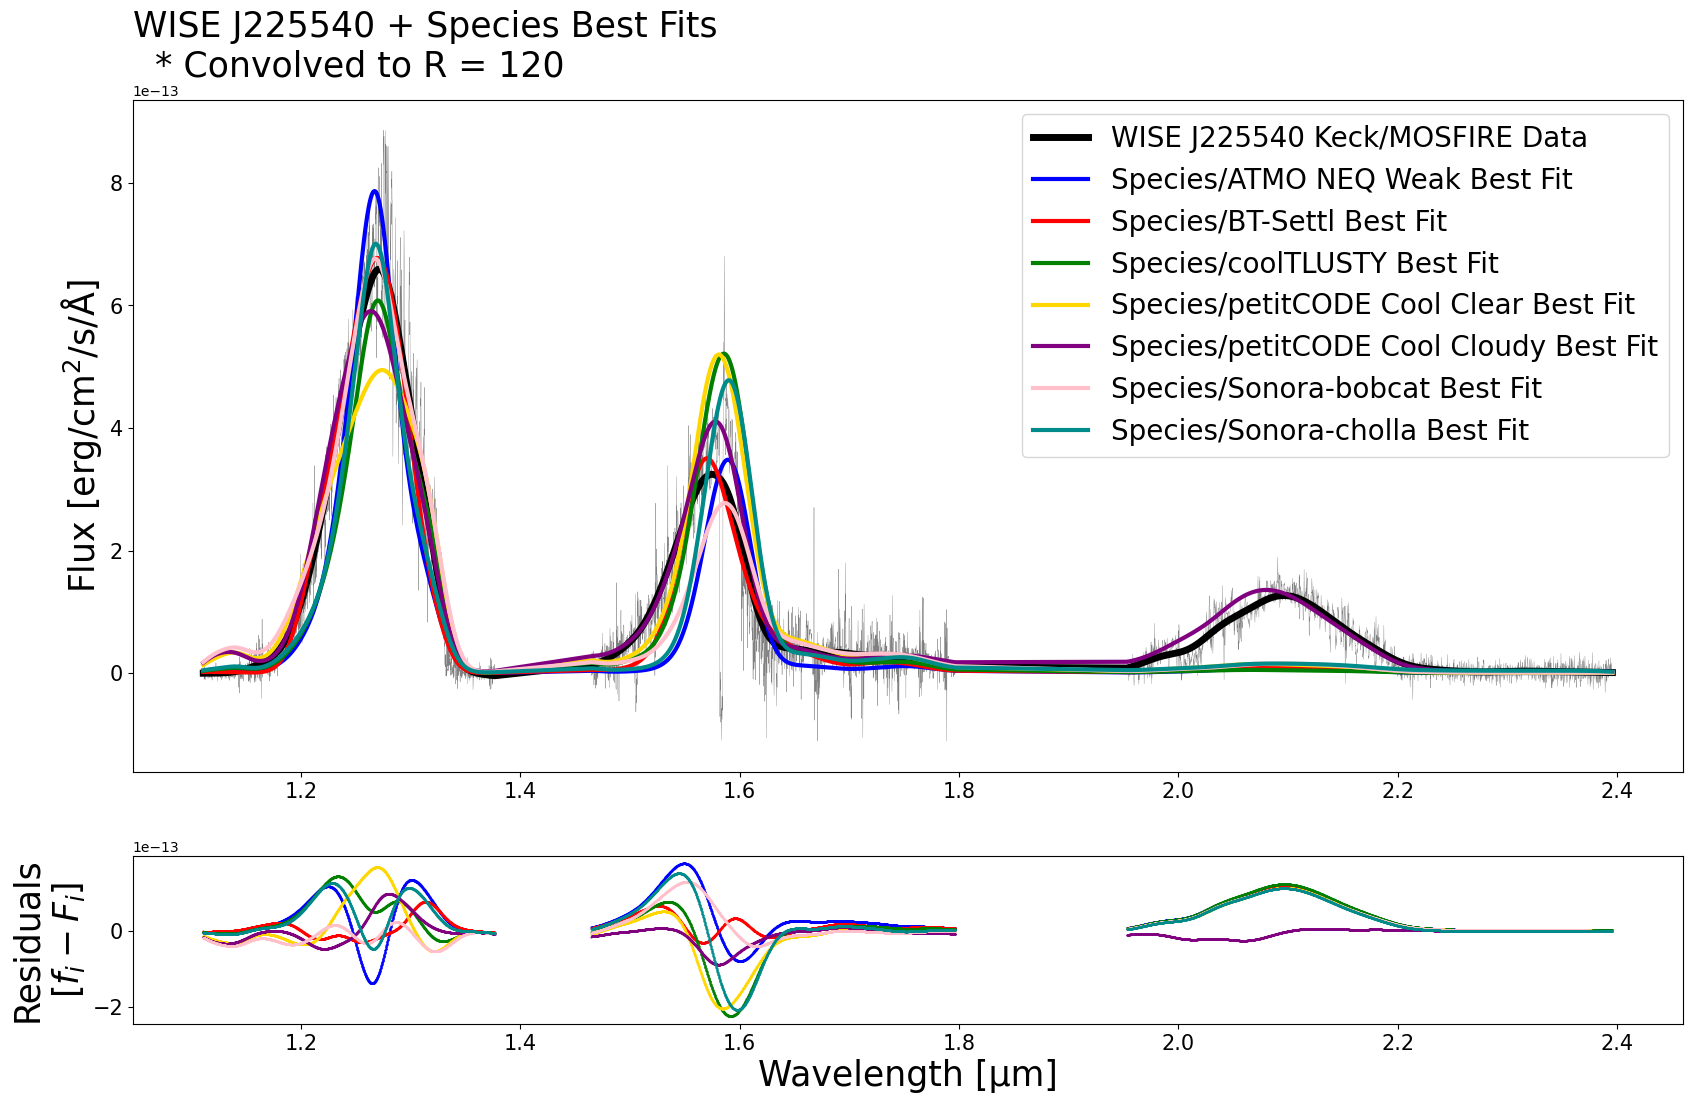

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 5, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_atmoNW[modindex_atmoNW, 0, :], low_mod_atmoNW[modindex_atmoNW, 1, :] * C_atmoNWmin, color = 'blue', linewidth = 3, label = 'Species/ATMO NEQ Weak Best Fit')
ax1.plot(low_mod_bt[modindex_bt, 0, :], low_mod_bt[modindex_bt, 1, :] * C_btmin, color = 'red', linewidth = 3, label = 'Species/BT-Settl Best Fit')
ax1.plot(low_mod_coolTLUSTY[modindex_coolTLUSTY, 0, :], low_mod_coolTLUSTY[modindex_coolTLUSTY, 1, :] * C_coolTLUSTYmin, color = 'green', linewidth = 3, label = 'Species/coolTLUSTY Best Fit')
ax1.plot(low_mod_petitcoolclear[modindex_petitcoolclear, 0, :], low_mod_petitcoolclear[modindex_petitcoolclear, 1, :] * C_petitcoolclearmin, color = 'gold', linewidth = 3, label = 'Species/petitCODE Cool Clear Best Fit')
ax1.plot(low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 0, :], low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin, color = 'purple', linewidth = 3, label = 'Species/petitCODE Cool Cloudy Best Fit')
ax1.plot(low_mod_bobcat[modindex_bobcat, 0, :], low_mod_bobcat[modindex_bobcat, 1, :] * C_bobcatmin, color = 'pink', linewidth = 3, label = 'Species/Sonora-bobcat Best Fit')
ax1.plot(low_mod_cholla[modindex_cholla, 0, :], low_mod_cholla[modindex_cholla, 1, :] * C_chollamin, color = 'darkcyan', linewidth = 3, label = 'Species/Sonora-cholla Best Fit')
ax1.set_title(f'{target_short} + Species Best Fits\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
#ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_atmoNSmin}\n  * Minimum G value: {G_atmoNSmin}\n  * T$_e$$_f$$_f$: 404 K\n  * logg: 5.2\n', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_atmoNW, color = 'blue', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_bt, color = 'red', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_coolTLUSTY, color = 'green', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_petitcoolclear, color = 'gold', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_petitcoolcloudy, color = 'purple', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_bobcat, color = 'pink', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_cholla, color = 'darkcyan', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species Best Fits')

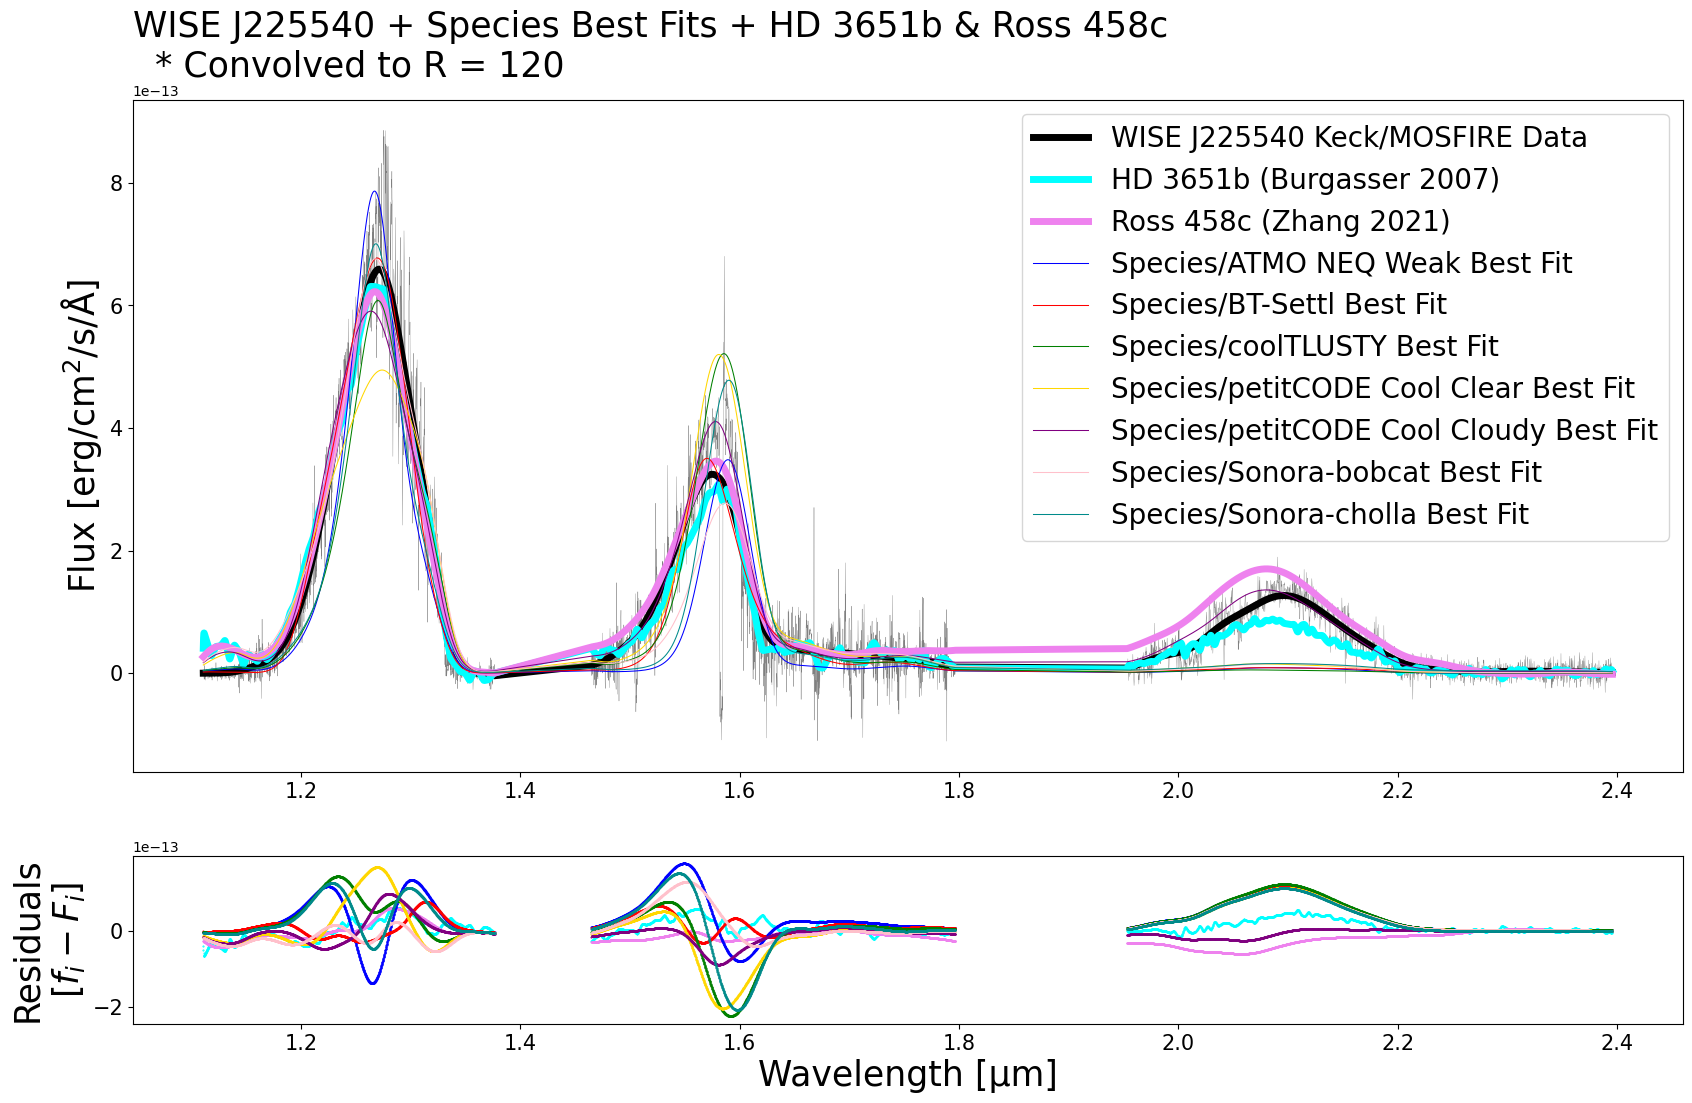

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 5, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_t75[modindex_t75, 0, :] * 1e-4, low_mod_t75[modindex_t75, 1, :] * Ct75_min, color = 'aqua', linewidth = 5, label = 'HD 3651b (Burgasser 2007)')
ax1.plot(low_mod_ross[modindex_ross, 0, :], low_mod_ross[modindex_ross, 1, :] * C_rossmin, color = 'violet', linewidth = 5, label = 'Ross 458c (Zhang 2021)')
ax1.plot(low_mod_atmoNW[modindex_atmoNW, 0, :], low_mod_atmoNW[modindex_atmoNW, 1, :] * C_atmoNWmin, color = 'blue', linewidth = 0.75, label = 'Species/ATMO NEQ Weak Best Fit')
ax1.plot(low_mod_bt[modindex_bt, 0, :], low_mod_bt[modindex_bt, 1, :] * C_btmin, color = 'red', linewidth = 0.75, label = 'Species/BT-Settl Best Fit')
ax1.plot(low_mod_coolTLUSTY[modindex_coolTLUSTY, 0, :], low_mod_coolTLUSTY[modindex_coolTLUSTY, 1, :] * C_coolTLUSTYmin, color = 'green', linewidth = 0.75, label = 'Species/coolTLUSTY Best Fit')
ax1.plot(low_mod_petitcoolclear[modindex_petitcoolclear, 0, :], low_mod_petitcoolclear[modindex_petitcoolclear, 1, :] * C_petitcoolclearmin, color = 'gold', linewidth = 0.75, label = 'Species/petitCODE Cool Clear Best Fit')
ax1.plot(low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 0, :], low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin, color = 'purple', linewidth = 0.75, label = 'Species/petitCODE Cool Cloudy Best Fit')
ax1.plot(low_mod_bobcat[modindex_bobcat, 0, :], low_mod_bobcat[modindex_bobcat, 1, :] * C_bobcatmin, color = 'pink', linewidth = 0.75, label = 'Species/Sonora-bobcat Best Fit')
ax1.plot(low_mod_cholla[modindex_cholla, 0, :], low_mod_cholla[modindex_cholla, 1, :] * C_chollamin, color = 'darkcyan', linewidth = 0.75, label = 'Species/Sonora-cholla Best Fit')
ax1.set_title(f'{target_short} + Species Best Fits + HD 3651b & Ross 458c\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
#ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_atmoNSmin}\n  * Minimum G value: {G_atmoNSmin}\n  * T$_e$$_f$$_f$: 404 K\n  * logg: 5.2\n', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_t75, color = 'aqua', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_ross, color = 'violet', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_atmoNW, color = 'blue', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_bt, color = 'red', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_coolTLUSTY, color = 'green', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_petitcoolclear, color = 'gold', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_petitcoolcloudy, color = 'purple', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_bobcat, color = 'pink', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_cholla, color = 'darkcyan', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('Species Best Fits + HD 3651b and Ross 458c')

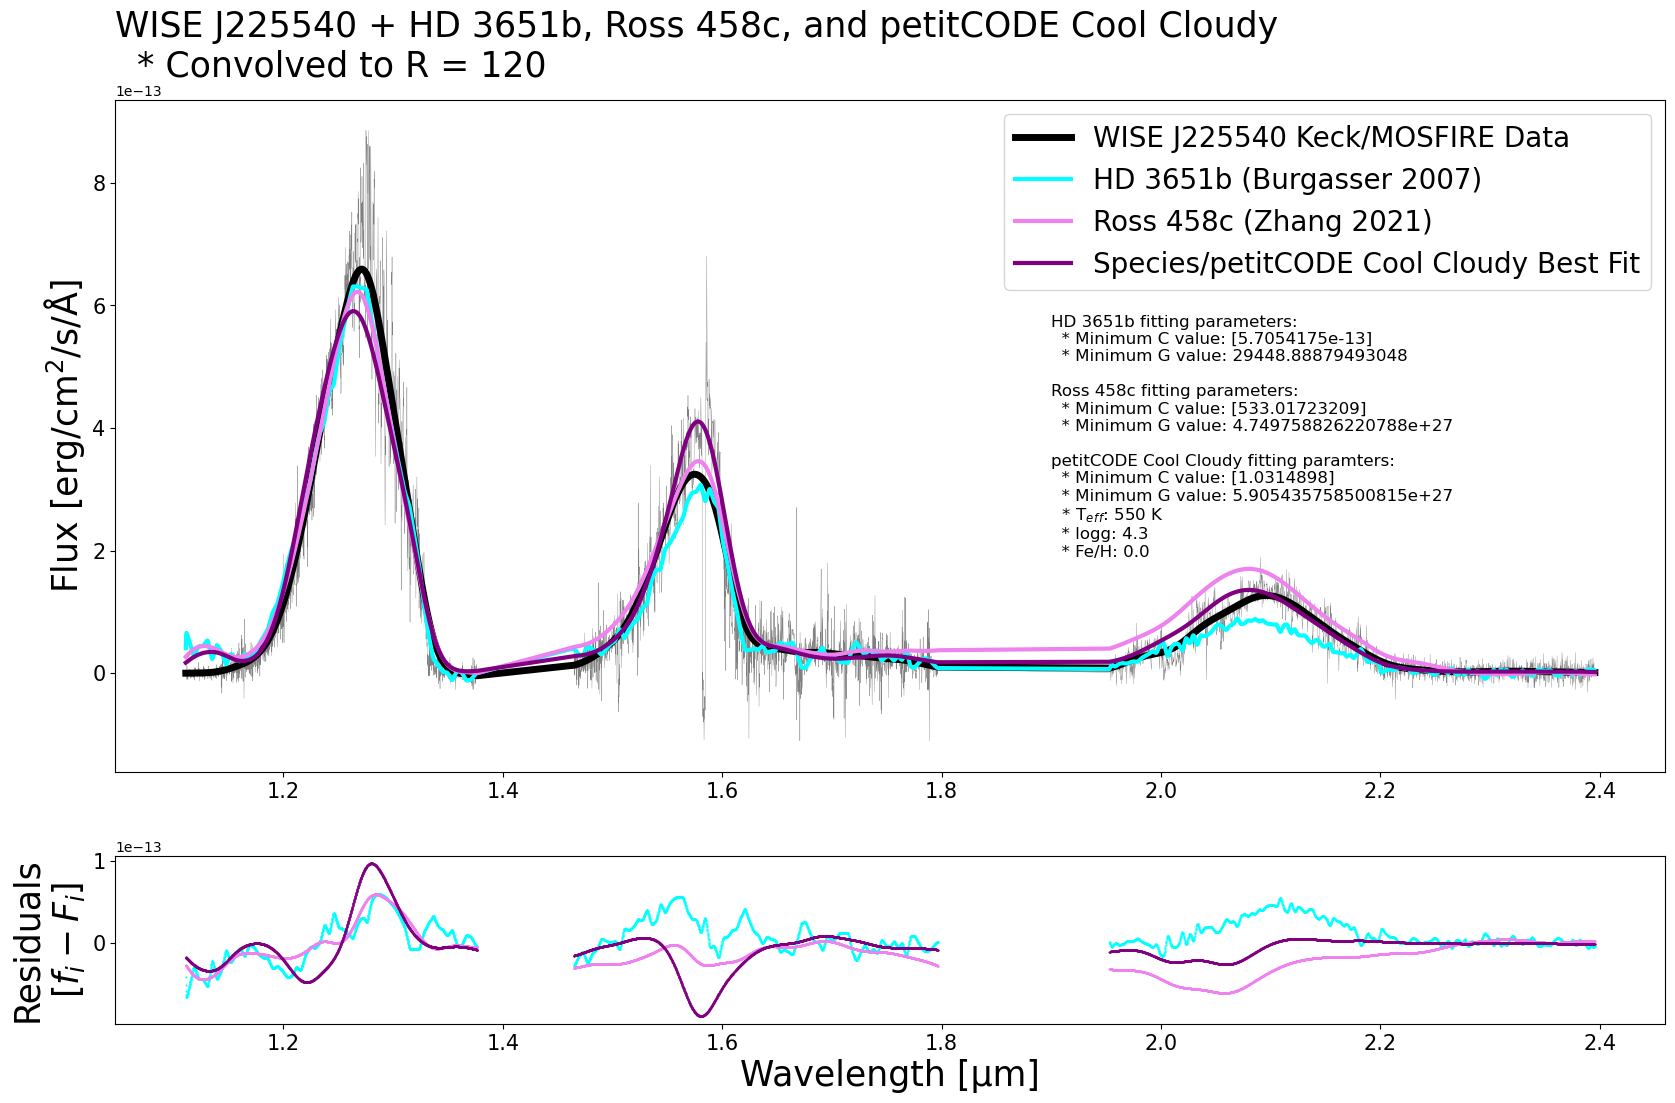

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20, 12), gridspec_kw = {'height_ratios': [4, 1]})
ax1.plot(wave_um, flux, color = 'gray', linewidth = 0.25)
ax1.plot(w_smooth, f_smooth, color = 'black', linewidth = 5, label = f'{target_short} Keck/MOSFIRE Data')
ax1.plot(low_mod_t75[modindex_t75, 0, :] * 1e-4, low_mod_t75[modindex_t75, 1, :] * Ct75_min, color = 'aqua', linewidth = 3, label = 'HD 3651b (Burgasser 2007)')
ax1.plot(low_mod_ross[modindex_ross, 0, :], low_mod_ross[modindex_ross, 1, :] * C_rossmin, color = 'violet', linewidth = 3, label = 'Ross 458c (Zhang 2021)')
ax1.plot(low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 0, :], low_mod_petitcoolcloudy[modindex_petitcoolcloudy, 1, :] * C_petitcoolcloudymin, color = 'purple', linewidth = 3, label = 'Species/petitCODE Cool Cloudy Best Fit')
ax1.set_title(f'{target_short} + HD 3651b, Ross 458c, and petitCODE Cool Cloudy\n  * Convolved to R = 120', loc = 'left', fontsize = 25)
ax1.set_ylabel('Flux [erg/cm$^2$/s/Å]', fontsize = 25)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax1.legend(loc = 'upper right', fontsize = 20, fancybox = True)
ax1.annotate(f'HD 3651b fitting parameters:\n  * Minimum C value: {Ct75_min}\n  * Minimum G value: {Gt75_min}\n\nRoss 458c fitting parameters:\n  * Minimum C value: {C_rossmin}\n  * Minimum G value: {G_rossmin}\n\npetitCODE Cool Cloudy fitting paramters:\n  * Minimum C value: {C_petitcoolcloudymin}\n  * Minimum G value: {G_petitcoolcloudymin}\n  * T$_e$$_f$$_f$: 550 K\n  * logg: 4.3\n  * Fe/H: 0.0', (1.9, 1.9e-13), fontsize = 12) 
#ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_petitcoolcloudymin}\n  * Minimum G value: {G_petitcoolcloudymin}\n  * T$_e$$_f$$_f$: 550 K\n  * logg: 4.3\n  * Fe/H: 0.0', (1.95, 5e-13), fontsize = 15)

#ax1.annotate(f'Fitting parameters:\n  * Minimum C value: {C_atmoNSmin}\n  * Minimum G value: {G_atmoNSmin}\n  * T$_e$$_f$$_f$: 404 K\n  * logg: 5.2\n', (1.95, 5e-13), fontsize = 15)

ax2.scatter(w_smooth, residuals_t75, color = 'aqua', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_ross, color = 'violet', marker = '.', s = 1)
ax2.scatter(w_smooth, residuals_petitcoolcloudy, color = 'purple', marker = '.', s = 1)
ax2.set_xlabel('Wavelength [µm]', fontsize = 25)
ax2.set_ylabel(f'Residuals\n'r'$[f_i - F_i]$', fontsize=25)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.savefig('WISE J225540 - HD 3651b - Ross 458c - petitCODE Cool Clear')